In [2]:
#KNN - (K-Nearest Neighbour, K-En Yakın Komşu Algoritması)

#parametreler : K değeri ve Distance
"""
K değeri bilinmeyen noktamıza en yakın kaç noktayı seçeceğimiz sayıdır.
Genelde tek sayı seçilir.

"""
"""
Distance tipleri;
1- Euclideam: L2
2- Manhattan: L1 
3-Minkowski: Lp
4-Hamming
"""

'\nDistance tipleri;\n1- Euclideam: L2\n2- Manhattan: L1 \n3-Minkowski: Lp\n4-Hamming\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
data.shape

(891, 25)

In [6]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']
X.shape,y.shape

((891, 24), (891,))

In [7]:
#New Normalization Method: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
nx = pd.DataFrame(X_scaled, columns=X.columns)
nx.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(nx,y,random_state=56,stratify = y)
#stratify randomlaştırsakta yinede bölme işlemini garanti yapıyor.

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.metrics import f1_score

In [11]:
clf = KNN(n_neighbors = 10, metric = 'euclidean')

clf.fit(train_X,train_y)

test_predict = clf.predict(test_X)
k_1 = f1_score(test_predict, test_y)

In [12]:
#Elbow(dirsek) Method
def Elbow(K):
    test_error = []
    
    for i in K:
        clf = KNN(n_neighbors=i)
        clf.fit(train_X,train_y)
        #f1-score uc uca ekleme
        tmp = clf.predict(test_X)
        tmp = f1_score(tmp, test_y)
        error = 1 - tmp
        test_error.append(error)
    return test_error

In [13]:
k = range(6, 30, 2)

In [14]:
test = Elbow(k)

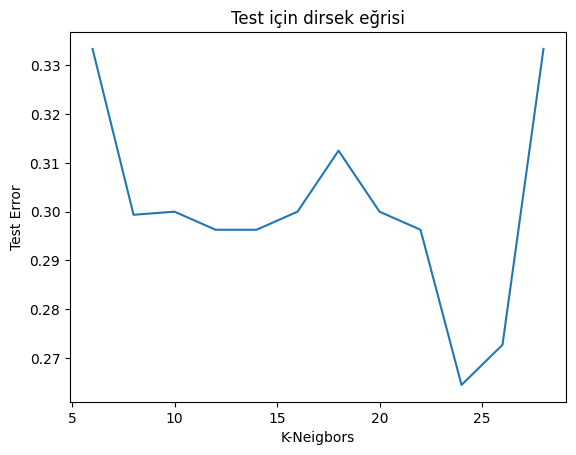

In [15]:
plt.plot(k,test)
plt.xlabel('K-Neigbors')
plt.ylabel('Test Error')
plt.title('Test için dirsek eğrisi')
plt.show()


In [16]:
#istikrarlı artış hangi k dan sonra olmuş, K = 27
clf = KNN(n_neighbors = 27)

clf.fit(train_X,train_y)

test_predict = clf.predict(test_X)
k_2 = f1_score(test_predict, test_y)

In [17]:
print("Dirsek öncesi KNN Skoru: ",k_1,"\nDirsek Sonrası KNN Skoru: ",k_2)

Dirsek öncesi KNN Skoru:  0.7000000000000001 
Dirsek Sonrası KNN Skoru:  0.7435897435897435


In [18]:
#Naive-Bayes Algoritması

"""
1-Multinomial Naive Bayes: Döküman Sınıflandırma
2- Bernoulli Naive Bayes: Yes-No Var-Yok 1-0
3-Gaussian Naive Bayes: Ayrık değil sürekli değerler kullanılır.
"""

'\n1-Multinomial Naive Bayes: Döküman Sınıflandırma\n2- Bernoulli Naive Bayes: Yes-No Var-Yok 1-0\n3-Gaussian Naive Bayes: Ayrık değil sürekli değerler kullanılır.\n'

In [19]:
#NB örnek
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


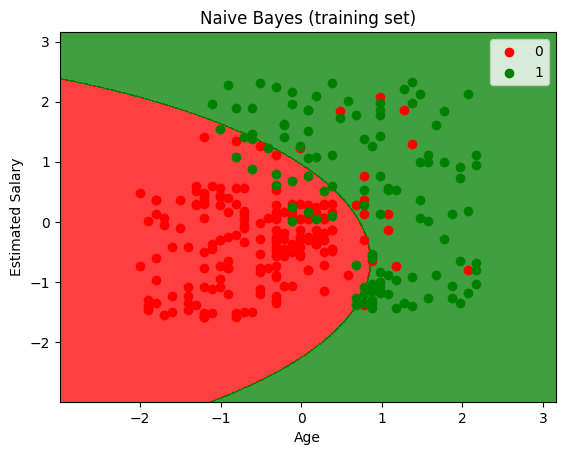

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


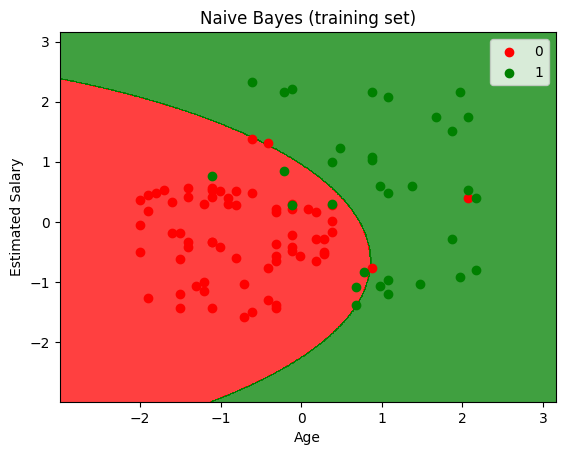

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

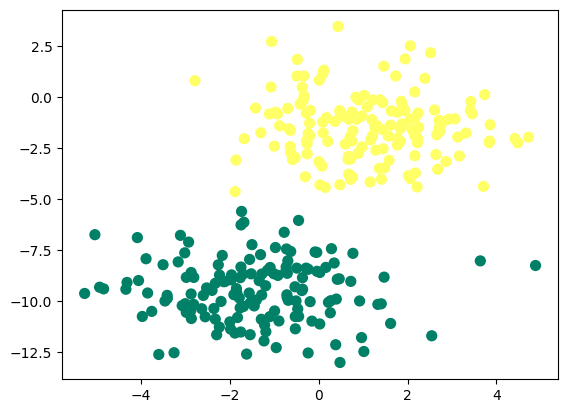

In [28]:
#NB 2. Örnek
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers = 2, random_state = 2, cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X, y)

GaussianNB()

In [30]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model_GNB.predict(Xnew)

(-5.7768867977493095,
 5.3905476345620285,
 -13.81911899777344,
 4.270135654515686)

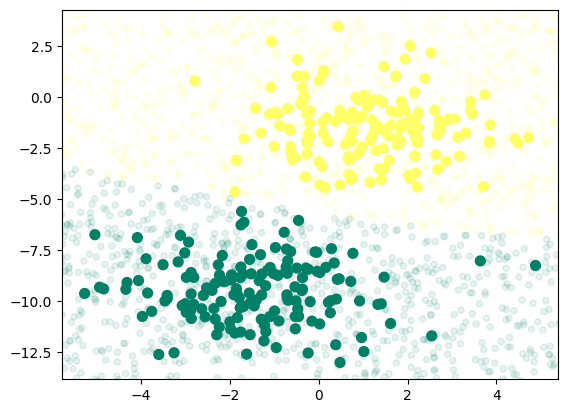

In [31]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, s = 20, cmap = 'summer', alpha = 0.1)
plt.axis(lim)

In [32]:
yprob = model_GNB.predict_proba(Xnew)
yprob[-10:].round(3)

array([[0.998, 0.002],
       [1.   , 0.   ],
       [0.987, 0.013],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.986, 0.014]])